<a href="https://colab.research.google.com/github/mirjanaa/Bee-Colony-Optimization/blob/main/money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import math
from matplotlib import pyplot as plt

## ABC algorithm for minimum coin change problem

In [ ]:
class FoodSource:
  def __init__(self, bounds, obj_function, target, beta_parameter, values):
    self.din_1 = random.randrange(bounds[0]+1)
    self.din_2 = random.randrange(bounds[1]+1)
    self.din_5 = random.randrange(bounds[2]+1)
    self.din_10 = random.randrange(bounds[3]+1)
    self.din_20 = random.randrange(bounds[4]+1)

    self.position = np.array([self.din_1, self.din_2, self.din_5, self.din_10, self.din_20])
    self.target = target
    self.obj_value = obj_function(self.position, self.target, beta_parameter, values)
    self.fitness = self.calculate_fitness()
    self.trial = 0
    self.probability = 0

  def __lt__(self, other):
    return self.obj_value < other.obj_value

  def __gt__(self, other):
    return self.fitness > other.fitness

  def calculate_fitness(self):
    if self.obj_value >= 0:
      return 1 / (1 + self.obj_value)
    return 1 + abs(self.obj_value)

In [ ]:
def obj_function(position, target, beta, values):
  alpha = 1 

  din_1 = position[0]
  din_2 = position[1]
  din_5 = position[2]
  din_10 = position[3]
  din_20 = position[4]

  value = values[0]*din_1 + values[1]*din_2 + values[2]*din_5 + values[3]*din_10 + values[4]*din_20
  count = din_1 + din_2 + din_5 + din_10 + din_20

  return alpha*abs(target - value) + beta*(count)

In [ ]:
def generate_new_solution(i, population, bounds, option, beta_parameter, values):
  j = random.randrange(len(bounds))
  partner = random.randrange(len(population))

  while i == partner:
    partner = random.randrange(len(population))

  old_fitness = population[i].fitness
  old_objective_value = population[i].obj_value

  old_j = population[i].position[j]
  phi = random.randrange(0, 2)
  if option == 'average':
    new_j = math.floor((population[i].position[j] + population[partner].position[j]) / 2) + phi
  elif option == 'max':
    new_j = max(population[i].position[j], population[partner].position[j]) + phi

  population[i].position[j] = new_j
  population[i].position[j] = np.clip(population[i].position[j], 0, bounds[j])

  new_objective_value = obj_function(population[i].position, population[i].target, beta_parameter, values)

  population[i].obj_value = new_objective_value
  population[i].fitness = population[i].calculate_fitness()

  if population[i].fitness > old_fitness:
    population[i].trial = 0
  else:
    population[i].position[j] = old_j
    population[i].obj_value = old_objective_value
    population[i].fitness = old_fitness
    population[i].trial += 1

In [ ]:
def ABC_algorithm(population_size, num_of_iters, limit, obj_function, option, target, beta_parameter, bounds, values):

  POPULATION_SIZE = population_size
  NUM_OF_ITERATIONS = num_of_iters
  LIMIT = limit

  population = [FoodSource(bounds, obj_function, target, beta_parameter, values) for _ in range(POPULATION_SIZE)]

  best_solution = min(population)

  obj_values = []
  fitness_values = []

  for k in range(NUM_OF_ITERATIONS):
    #### Employed Bee Phase ####
    for i in range(POPULATION_SIZE):
      generate_new_solution(i, population, bounds, option, beta_parameter, values)

    #### Onlooker Bee Phase ####
    max_fitness = max([population[i].fitness for i in range(POPULATION_SIZE)])
    for i in range(POPULATION_SIZE):
      population[i].probability = 0.9 * (population[i].fitness / max_fitness) + 0.1

    m = 0
    n = 0

    while m < POPULATION_SIZE and n < POPULATION_SIZE:
      rand_value = random.uniform(0, 1)
      if rand_value < population[n].probability:
        generate_new_solution(n, population, bounds, option, beta_parameter, values)
        m += 1
      n = (n % POPULATION_SIZE) + 1

    best_solution = min(min(population), best_solution)

    #### Scout Bee Phase ####
    max_index = -1
    max_trial = float('-inf')
    for index, p in enumerate(population):
      if p.trial > max_trial:
        max_trial = p.trial
        max_index = index


    if population[max_index].trial > LIMIT:
      population[max_index] = FoodSource(bounds, obj_function, target, beta_parameter, values)

    best_solution = min(min(population), best_solution)

    obj_values.append(best_solution.obj_value)
    fitness_values.append(best_solution.fitness)

  print("position: ", [i for i in best_solution.position])
  print("objective value: ", best_solution.obj_value)
  print("fitness value: ", best_solution.fitness)


  return best_solution, obj_values, fitness_values

## Comparison of fitness values ​​during the execution of the algorithm depending on the way of making a new solution from the existing one

position:  [0, 5, 1, 2, 2]
objective value:  10
fitness value:  0.09090909090909091
position:  [0, 0, 1, 5, 1]
objective value:  7
fitness value:  0.125
position:  [0, 0, 3, 2, 2]
objective value:  7
fitness value:  0.125
position:  [0, 0, 1, 3, 2]
objective value:  6
fitness value:  0.14285714285714285
position:  [3, 1, 4, 1, 2]
objective value:  11
fitness value:  0.08333333333333333
position:  [2, 2, 0, 5, 1]
objective value:  11
fitness value:  0.08333333333333333
position:  [0, 2, 0, 3, 2]
objective value:  8
fitness value:  0.1111111111111111
position:  [0, 0, 1, 3, 2]
objective value:  6
fitness value:  0.14285714285714285
position:  [3, 1, 2, 2, 2]
objective value:  10
fitness value:  0.09090909090909091
position:  [0, 0, 1, 3, 2]
objective value:  6
fitness value:  0.14285714285714285


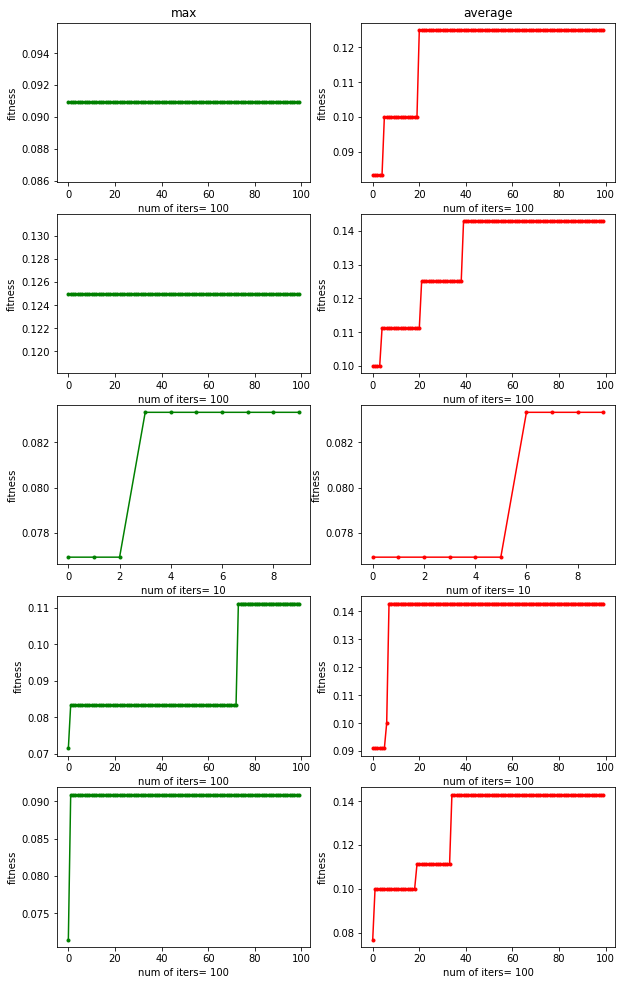

In [ ]:
bounds = [5, 10, 5, 15, 2]
values = [1, 2, 5, 10, 20]
population_size = [5, 50, 100, 300]
num_iters = [10, 100]
limit = [2, 5]
target = 75
beta_parameter = 1

tmp=5

plt.figure(figsize=(10, 17))

p = random.sample(population_size, k=1)[0]
n = random.sample(num_iters, k=1)[0]
l = random.sample(limit, k=1)[0]

best_solution, _, fitness_values = ABC_algorithm(p, n, l, obj_function, 'max', target, beta_parameter, bounds, values)
plt.subplot(tmp, 2, 1)
plt.plot(range(n), fitness_values, color='green', marker='.')
plt.xlabel("num of iters= " + str(n))
plt.ylabel("fitness")
plt.title('max')

best_solution, _, fitness_values = ABC_algorithm(p, n, l, obj_function, 'average', target, beta_parameter, bounds, values)
plt.subplot(tmp, 2, 2)
plt.plot(range(n), fitness_values, color='red', marker='.')
plt.xlabel("num of iters= " + str(n))
plt.ylabel("fitness")
plt.title('average')

for i in range(1, tmp):
  p = random.sample(population_size, k=1)[0]
  n = random.sample(num_iters, k=1)[0]
  l = random.sample(limit, k=1)[0]

  best_solution, _, fitness_values = ABC_algorithm(p, n, l, obj_function, 'max', target, beta_parameter, bounds, values)
  plt.subplot(tmp, 2, 2*i+1)
  plt.plot(range(n), fitness_values, color='green', marker='.')
  plt.xlabel("num of iters= " + str(n))
  plt.ylabel("fitness")

  best_solution, _, fitness_values = ABC_algorithm(p, n, l, obj_function, 'average', target, beta_parameter, bounds, values)
  plt.subplot(tmp, 2, 2*i+2)
  plt.plot(range(n), fitness_values, color='red', marker='.')
  plt.xlabel("num of iters= " + str(n))
  plt.ylabel("fitness")

plt.show()

## Comparison of objective function values during the execution of the algorithm depending on the way of making a new solution from the existing one

position:  [1, 2, 2, 4, 1]
objective value:  10
fitness value:  0.09090909090909091
position:  [0, 0, 1, 3, 2]
objective value:  6
fitness value:  0.14285714285714285
position:  [0, 0, 1, 5, 1]
objective value:  7
fitness value:  0.125
position:  [0, 0, 3, 2, 2]
objective value:  7
fitness value:  0.125
position:  [0, 2, 2, 2, 2]
objective value:  9
fitness value:  0.1
position:  [0, 0, 1, 3, 2]
objective value:  6
fitness value:  0.14285714285714285
position:  [1, 4, 1, 2, 2]
objective value:  11
fitness value:  0.08333333333333333
position:  [0, 1, 1, 3, 2]
objective value:  9
fitness value:  0.1
position:  [0, 7, 4, 2, 1]
objective value:  15
fitness value:  0.0625
position:  [2, 4, 3, 3, 1]
objective value:  13
fitness value:  0.07142857142857142


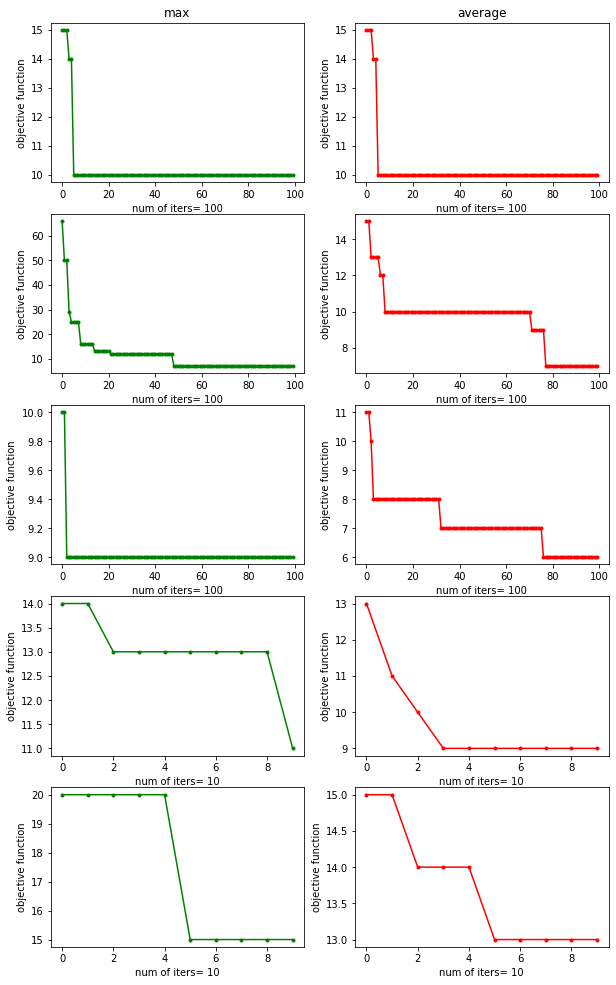

In [ ]:
plt.figure(figsize=(10, 17))

p = random.sample(population_size, k=1)[0]
n = random.sample(num_iters, k=1)[0]
l = random.sample(limit, k=1)[0]

best_solution, obj_values, _ = ABC_algorithm(p, n, l, obj_function, 'max', target, beta_parameter, bounds, values)
plt.subplot(tmp, 2, 1)
plt.plot(range(n), obj_values, color='green', marker='.')
plt.xlabel("num of iters= " + str(n))
plt.ylabel("objective function")
plt.title('max')

best_solution, _obj_values, _ = ABC_algorithm(p, n, l, obj_function, 'average', target, beta_parameter, bounds, values)
plt.subplot(tmp, 2, 2)
plt.plot(range(n), obj_values, color='red', marker='.')
plt.xlabel("num of iters= " + str(n))
plt.ylabel("objective function")
plt.title('average')

for i in range(1, tmp):
  p = random.sample(population_size, k=1)[0]
  n = random.sample(num_iters, k=1)[0]
  l = random.sample(limit, k=1)[0]

  best_solution, obj_values, _ = ABC_algorithm(p, n, l, obj_function, 'max', target, beta_parameter, bounds, values)
  plt.subplot(tmp, 2, 2*i+1)
  plt.plot(range(n), obj_values, color='green', marker='.')
  plt.xlabel("num of iters= " + str(n))
  plt.ylabel("objective function")

  best_solution, obj_values, _ = ABC_algorithm(p, n, l, obj_function, 'average', target, beta_parameter, bounds, values)
  plt.subplot(tmp, 2, 2*i+2)
  plt.plot(range(n), obj_values, color='red', marker='.')
  plt.xlabel("num of iters= " + str(n))
  plt.ylabel("objective function")

plt.show()

Comparison of solution finding speed and solution quality depending on beta parameter

position:  [0, 0, 1, 5, 1]
objective value:  7
fitness value:  0.125
position:  [0, 0, 1, 5, 1]
objective value:  7.700000000000001
fitness value:  0.11494252873563217
position:  [0, 0, 1, 3, 2]
objective value:  7.199999999999999
fitness value:  0.12195121951219513
position:  [0, 0, 1, 3, 2]
objective value:  7.800000000000001
fitness value:  0.11363636363636363
position:  [0, 0, 1, 3, 2]
objective value:  8.399999999999999
fitness value:  0.10638297872340427
position:  [0, 2, 0, 3, 2]
objective value:  11.5
fitness value:  0.08


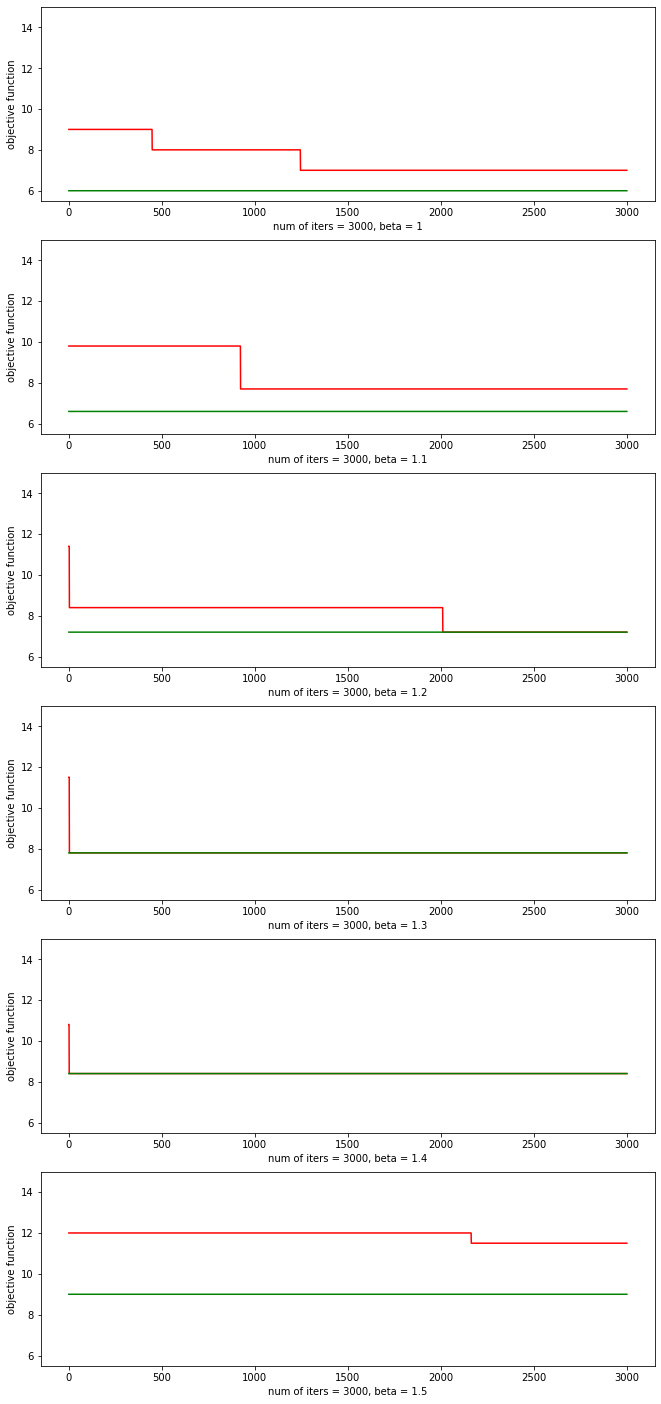

In [ ]:
beta_parameters = [1, 1.1, 1.2, 1.3, 1.4, 1.5]
n = len(beta_parameters)
population_size = 800
num_of_iters = 3000
limit = 5
option = 'max'
target = 75

fitness = []

plt.figure(figsize=(11, 25))

for i in range(n):
  best_solution, _obj_values, _ = ABC_algorithm(population_size, num_of_iters, limit, obj_function, option, target, beta_parameters[i], bounds, values)
  fitness.append(_)
  real_best_obj = obj_function([0, 0, 1, 3, 2], target, beta_parameters[i], values)
  plt.subplot(n, 1, i+1)
  plt.ylim(5.5, 15)
  plt.plot(range(num_of_iters), _obj_values, color='red')
  plt.plot(range(num_of_iters), [real_best_obj for _ in range(num_of_iters)], color='green')
  plt.xlabel("num of iters = " + str(num_of_iters) + ", beta = " + str(beta_parameters[i]))
  plt.ylabel("objective function")

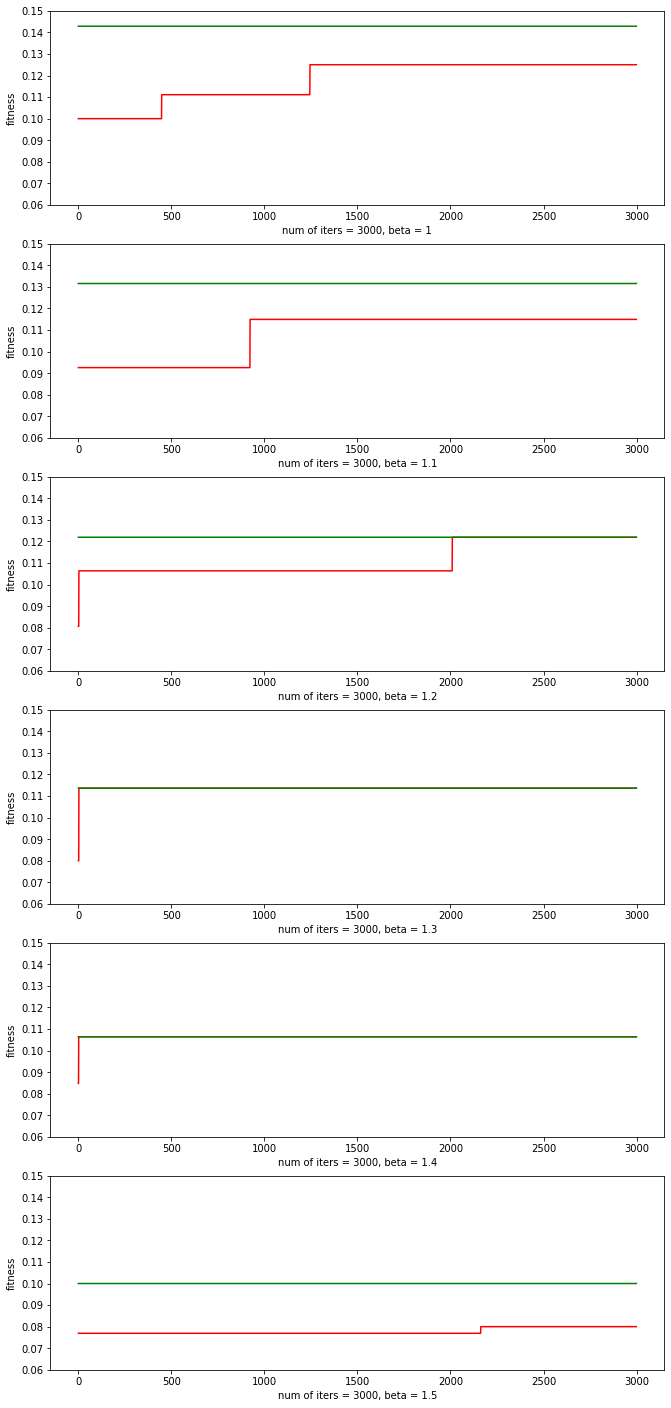

In [ ]:
plt.figure(figsize=(11, 25))

for i in range(n):
  real_best_obj = obj_function([0, 0, 1, 3, 2], target, beta_parameters[i], values)
  real_best_fitness = 1 / (1 + real_best_obj)
  plt.subplot(n, 1, i+1)
  plt.ylim(0.06, 0.15)
  plt.plot(range(num_of_iters), fitness[i], color='red')
  plt.plot(range(num_of_iters), [real_best_fitness for _ in range(num_of_iters)], color='green')
  plt.xlabel("num of iters = " + str(num_of_iters) + ", beta = " + str(beta_parameters[i]))
  plt.ylabel("fitness")